<a href="https://colab.research.google.com/github/bokchisojeong/bokchi_open_lab/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 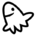 deepdriver quickstart!

welecome to deepdriver! 😀

You can refer to the guide document.
https://bokchi.gitbook.io/deepdriver-ce/

# 0. 💻 install deepdriver

In [5]:
pip install deepdriver==0.0.48

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 11.5 MB/s 
     |████████████████████████████████| 46 kB 4.1 MB/s 
     |████████████████████████████████| 409 kB 72.9 MB/s 
  Created wheel for assertpy: filename=assertpy-1.1-py3-none-any.whl size=42917 sha256=26767cbf9c7f889badc1730f70a16d803fffed3ec7a59ccdbcf998ef86e0b3b2
  Stored in directory: /root/.cache/pip/wheels/57/86/c9/1310be6ddfb540daa0bf1ac204526837aa0a8b0e79f32855ff
Successfully built assertpy
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.11 which is incompatible.
te

#1. ➕ import deepdriver



In [17]:
import deepdriver

#2. ⚙ deepdriver server setting

In [18]:
deepdriver.setting(http_host="quick-experience.bokchi.com:9011" ,grpc_host="quick-experience.bokchi.com:19051")

#3. 🔌 log in to deepdriver

In [19]:
deepdriver.login(key="MGY2ZWY5NjY0NjE3YjVkODBhNGRkYjBkZDAzYzQ5MGMxMzVhZWRhNzkyYTdiNDI4ZGZmYjZmZDhmYzdkY2I3ZQ==")

True

#4. 🥼 create experiment and run

In [21]:
def make_exp_name():
  import socket
  from datetime import datetime
  host_name = socket.gethostname()
  date = datetime.today().strftime("%Y%m%d") 

  return "exp" + "_" +host_name +"_"+date

In [22]:
# experiment init & config hyperparam
deepdriver.init(exp_name= "exper_cat_dog_cnn", 
                config={ 'architecture':"CNN", 'epoch': 100, 'batch_size': 32, 'hidden_layer':512})

2022-12-14 01:14:46,690 INFO [deepdriver] [experiment.py:21] - DeepDriver initialized
Team Name=molamola.babo
Exp Name=exper_cat_dog_cnn
Run Name=run-1
Run URL=http://quick-experience.bokchi.com:9111/experi/molamola.babo/exper_cat_dog_cnn/run-1/run/chart


INFO:deepdriver:DeepDriver initialized
Team Name=molamola.babo
Exp Name=exper_cat_dog_cnn
Run Name=run-1
Run URL=http://quick-experience.bokchi.com:9111/experi/molamola.babo/exper_cat_dog_cnn/run-1/run/chart


데이터 준비

In [2]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_and_dogs_filtered.zip

--2022-12-14 00:58:51--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 2607:f8b0:4023:c0d::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  89.5MB/s    in 0.7s    

2022-12-14 00:58:52 (89.5 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [26]:
import os
import zipfile

data_dir = '/content/cat_dog/'
os.mkdir(data_dir)
local_zip = '/tmp/cats_and_dogs_filtered.zip'
train_dir ='/tmp/cats_and_dogs_filtered/train'
train_doc_dir='/tmp/cats_and_dogs_filtered/train/dog'
train_cat_dir='/tmp/cats_and_dogs_filtered/train/cat'
valid_dir ='/tmp/cats_and_dogs_filtered/validation'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [27]:
# train용 폴더 생성
train_set_dir = os.path.join(data_dir, 'train_set')
os.mkdir(train_set_dir)
train_dog_dir = os.path.join(train_set_dir, 'dog')
os.mkdir(train_dog_dir)
train_cat_dir = os.path.join(train_set_dir, 'cat')
os.mkdir(train_cat_dir)
# valid용 폴더 생성
valid_set_dir = os.path.join(data_dir, 'valid_set')
os.mkdir(valid_set_dir)
valid_dog_dir = os.path.join(valid_set_dir, 'dog')
os.mkdir(valid_dog_dir)
valid_cat_dir = os.path.join(valid_set_dir, 'cat')
os.mkdir(valid_cat_dir)
# test용 폴더 생성
test_set_dir = os.path.join(data_dir, 'test_set')
os.mkdir(test_set_dir)
test_dog_dir = os.path.join(test_set_dir, 'dog')
os.mkdir(test_dog_dir)
test_cat_dir = os.path.join(test_set_dir, 'cat')
os.mkdir(test_cat_dir)

In [ ]:
# image file name list 생성

total_data_count =150
train_data_count =100
test_data_count = 30
valid_data_count =20
dog_files = [f'dog.{i}.jpg' for i in range(150)]
cat_files = [f'cat.{i}.jpg' for i in range(150)]

 
# 각 폴더로 image 이동
for file in dog_files[:100]:
    src = os.path.join(train_dir, file)
    dst = os.path.join(train_dog_dir, file)
    shutil.move(src, dst)
    
for file in dog_files[100:130]:
    src = os.path.join(train_dir, file)
    dst = os.path.join(valid_dog_dir, file)
    shutil.move(src, dst)
 
for file in dog_files[130:150]:
    src = os.path.join(train_dir, file)
    dst = os.path.join(test_dog_dir, file)
    shutil.move(src, dst)
 
for file in cat_files[:10000]:
    src = os.path.join(train_dir, file)
    dst = os.path.join(train_cat_dir, file)
    shutil.move(src, dst)
    
for file in cat_files[10000:12000]:
    src = os.path.join(train_dir, file)
    dst = os.path.join(valid_cat_dir, file)
    shutil.move(src, dst)
 
for file in cat_files[12000:12500]:
    src = os.path.join(train_dir, file)
    dst = os.path.join(test_cat_dir, file)
    shutil.move(src, dst)

#5. 📚 train your code and send log

In [ ]:
import random
accuracy = [ random.uniform(0.7+0.02*i, 1)  for i in range(epoch)]
train_loss = [ random.uniform(0.1,  0.2-0.01*i)  for i in range(epoch)]
val_accuracy =[ random.uniform(0.7+0.02*i, 1)  for i in range(epoch)]
val_loss = [ random.uniform(0.2,  0.3-0.01*i)  for i in range(epoch)]

In [ ]:
for i in range(epoch):
    # send train log
    deepdriver.log({'acc': accuracy[i], 'loss': train_loss[i], 'val_acc': val_accuracy[i],'val_loss': val_loss[i]})

#6. ⬆ upload artifact(data)

In [13]:
arti = deepdriver.Artifacts(name="cat_dog",type="dataset")

In [14]:
arti.add("/tmp/cats_and_dogs_filtered")

In [15]:
[ent.path for ent  in arti.entry_list]

['train/cats/cat.250.jpg',
 'train/cats/cat.726.jpg',
 'train/cats/cat.793.jpg',
 'train/cats/cat.521.jpg',
 'train/cats/cat.928.jpg',
 'train/cats/cat.251.jpg',
 'train/cats/cat.185.jpg',
 'train/cats/cat.866.jpg',
 'train/cats/cat.875.jpg',
 'train/cats/cat.485.jpg',
 'train/cats/cat.550.jpg',
 'train/cats/cat.748.jpg',
 'train/cats/cat.791.jpg',
 'train/cats/cat.292.jpg',
 'train/cats/cat.31.jpg',
 'train/cats/cat.262.jpg',
 'train/cats/cat.429.jpg',
 'train/cats/cat.665.jpg',
 'train/cats/cat.901.jpg',
 'train/cats/cat.142.jpg',
 'train/cats/cat.422.jpg',
 'train/cats/cat.518.jpg',
 'train/cats/cat.684.jpg',
 'train/cats/cat.488.jpg',
 'train/cats/cat.641.jpg',
 'train/cats/cat.539.jpg',
 'train/cats/cat.63.jpg',
 'train/cats/cat.718.jpg',
 'train/cats/cat.138.jpg',
 'train/cats/cat.658.jpg',
 'train/cats/cat.527.jpg',
 'train/cats/cat.136.jpg',
 'train/cats/cat.405.jpg',
 'train/cats/cat.975.jpg',
 'train/cats/cat.919.jpg',
 'train/cats/cat.574.jpg',
 'train/cats/cat.410.jpg',
 't

In [16]:
deepdriver.upload_artifact(arti)

Uploading: [./../tmp/cats_and_dogs_filtered/train/cats/cat.196.jpg] |██████████████████████████████| [100.0%] [140/3001

KeyboardInterrupt: ignored

#7. ⬇ download artifact(data)

In [ ]:
arti2 = deepdriver.get_artifact(name="sample",type="dataset")

2022-12-09 07:57:08,959 INFO [deepdriver] [run.py:38] - artifact is got! 
 artifact id :{1}


INFO:deepdriver:artifact is got! 
 artifact id :{1}


In [ ]:
arti2.download()

Downloading: [./deepdriver/artifact/1/mnist_train_small.csv] |██████████████████████████████| [100.0%] [6/6]

'./deepdriver/artifact/1'

#8. 📊 visualize train result

In [ ]:
df =deepdriver.DataFrame(columns=["step","acc"], data=[ [idx, acc] for idx, acc in enumerate(accuracy)])

In [ ]:
line =deepdriver.line(df,"step","acc")

In [ ]:
deepdriver.visualize(line)

In [ ]:
df =deepdriver.DataFrame(columns=["step","loss"], data=[ [idx, loss] for idx, loss in enumerate(train_loss)])

In [ ]:
line =deepdriver.line(df,"step","loss")

In [ ]:
deepdriver.visualize(line)

In [ ]:
df =deepdriver.DataFrame(columns=["step","acc"], data=[ [idx, acc] for idx, acc in enumerate(accuracy)])

In [ ]:
historgram = deepdriver.histogram(df,"step","acc")

In [ ]:
deepdriver.visualize(historgram)

In [ ]:
scatter = deepdriver.scatter(df,"step","acc")

In [ ]:
deepdriver.visualize(scatter)

#9. 📈 send log for chart & table

In [ ]:
df =deepdriver.DataFrame(columns=["step","loss"], data=[ [idx, loss] for idx, loss in enumerate(train_loss)])
line =deepdriver.line(df,"step","loss")
deepdriver.log({"my_line_chart":line})

Uploading: [./deepdriver/run/1/chart/my_line_chart.CHART.json] |██████████████████████████████| [100.0%] [1/1]

True

In [ ]:
df =deepdriver.DataFrame(columns=["step","acc"], data=[ [idx, acc] for idx, acc in enumerate(accuracy)])
historgram = deepdriver.histogram(df,"step","acc")
deepdriver.log({"my_histogram_chart":historgram})

Uploading: [./deepdriver/run/1/chart/my_histogram_chart.CHART.json] |██████████████████████████████| [100.0%] [1/1]

True

In [ ]:
df =deepdriver.DataFrame(columns=["step","acc"], data=[ [idx, acc] for idx, acc in enumerate(accuracy)])
scatter = deepdriver.scatter(df,"step","acc")
deepdriver.log({"my_scatter_chart":scatter})

Uploading: [./deepdriver/run/1/chart/my_scatter_chart.CHART.json] |██████████████████████████████| [100.0%] [1/1]

True

#10. 🔚 finish run

In [ ]:
# finish experiment
deepdriver.finish()

True